In [2]:
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_excel('./dataset/RSW-dataset.xlsx')

In [4]:
df.columns

Index(['NUGGET.WIDTH.1', 'MATERIAL.1', 'THICKNESS.1', 'COATING.EG.1',
       'COATING.HDG.1', 'COATING.WEIGHT.1', 'SURFACE.CLASS.1', 'MATERIAL.2',
       'THICKNESS.2', 'COATING.EG.2', 'COATING.HDG.2', 'COATING.WEIGHT.2',
       'SURFACE.CLASS.2', 'WELD.FORCE', 'WELD.CURRENT', 'WELD.TIME'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NUGGET.WIDTH.1    1126 non-null   float64
 1   MATERIAL.1        1126 non-null   object 
 2   THICKNESS.1       1126 non-null   float64
 3   COATING.EG.1      1126 non-null   int64  
 4   COATING.HDG.1     1126 non-null   int64  
 5   COATING.WEIGHT.1  1126 non-null   int64  
 6   SURFACE.CLASS.1   1126 non-null   int64  
 7   MATERIAL.2        1126 non-null   object 
 8   THICKNESS.2       1126 non-null   float64
 9   COATING.EG.2      1126 non-null   int64  
 10  COATING.HDG.2     1126 non-null   int64  
 11  COATING.WEIGHT.2  1126 non-null   int64  
 12  SURFACE.CLASS.2   1126 non-null   int64  
 13  WELD.FORCE        1126 non-null   int64  
 14  WELD.CURRENT      1126 non-null   float64
 15  WELD.TIME         1126 non-null   float64
dtypes: float64(5), int64(9), object(2)
memory 

In [6]:
df.describe()

,NUGGET.WIDTH.1,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.0,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000
mean,4.491030,1.197425,0.012433,0.581705,41.015986,1.836590,1.340586,0.0,0.581705,41.015986,1.836590,880.117229,7.988348,359.560764
std,2.491282,0.162870,0.110859,0.493498,36.004120,0.986997,0.310749,0.0,0.493498,36.004120,0.986997,126.615472,1.708172,162.698768
min,0.000000,0.800000,0.000000,0.000000,0.000000,1.000000,0.800000,0.0,0.000000,0.000000,1.000000,499.000000,4.200000,166.700000
25%,3.600000,1.200000,0.000000,0.000000,0.000000,1.000000,1.200000,0.0,0.000000,0.000000,1.000000,899.000000,6.700000,250.050000
50%,5.100000,1.200000,0.000000,1.000000,60.000000,1.000000,1.200000,0.0,1.000000,60.000000,1.000000,910.000000,8.200000,300.060000
75%,6.300000,1.200000,0.000000,1.000000,70.000000,3.000000,1.400000,0.0,1.000000,70.000000,3.000000,910.000000,9.100000,400.000000
max,9.200000,1.500000,1.000000,1.000000,94.000000,3.000000,2.000000,0.0,1.000000,94.000000,3.000000,1124.000000,13.500000,800.000000


In [33]:
cat_features = [col for col in df.columns if df[col].dtype == 'object']
num_features = [col for col in df.columns if df[col].dtype != 'object']

# Distribution of target (NUGGET.WIDTH)
hows whether the target variable is normal, skewed, etc.

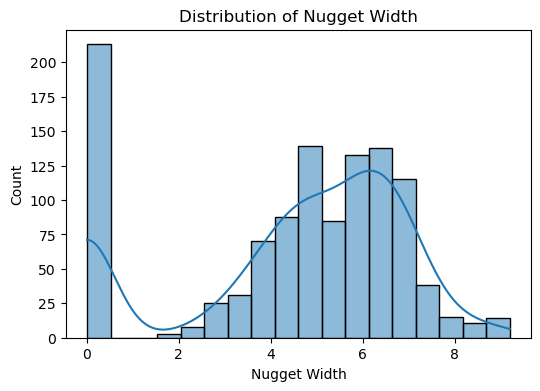

In [49]:
plt.figure(figsize=(6,4))
sns.histplot(df['NUGGET.WIDTH.1'], kde=True)
plt.title('Distribution of Nugget Width')
plt.xlabel('Nugget Width')
plt.ylabel('Count')
plt.show()

# Relationship with numerical features

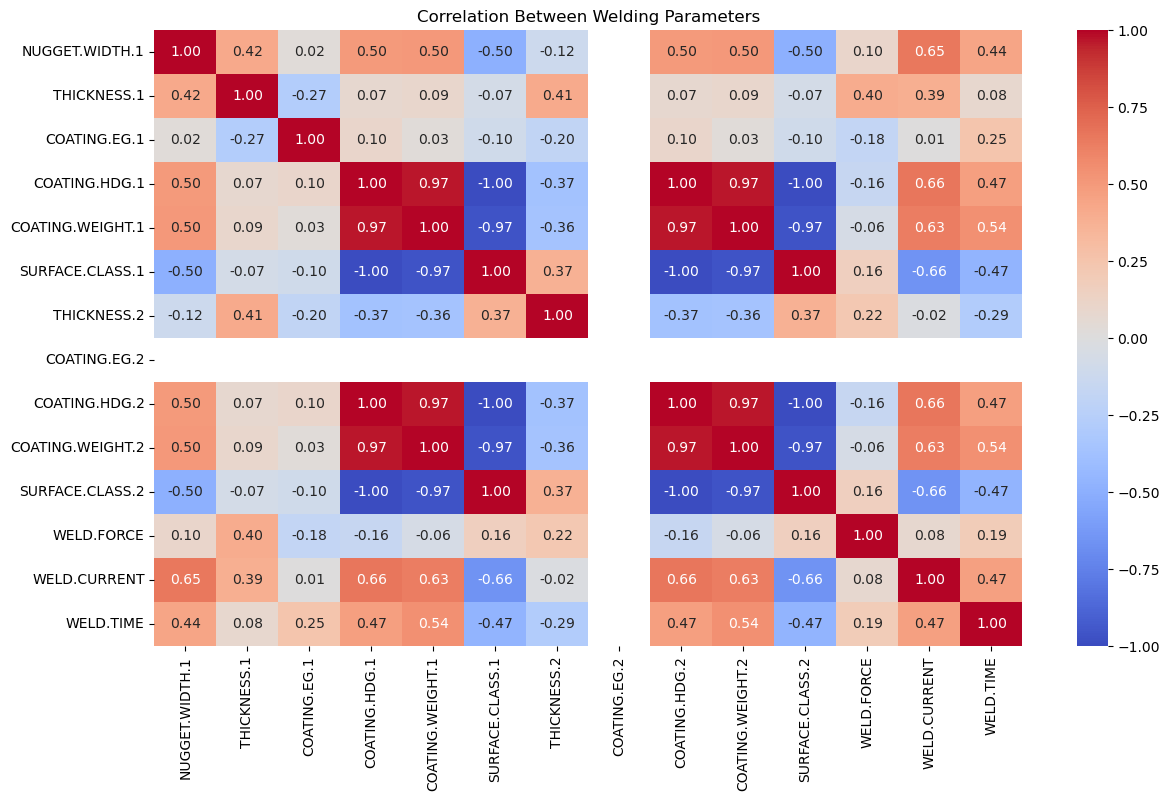

In [42]:
plt.figure(figsize=(14,8))
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Welding Parameters')
plt.show()

# Bar plot of average nugget width by material pair
This shows which material combinations produce wider or smaller nuggets.

In [43]:
df['MATERIAL_PAIR'] = df['MATERIAL.1'] + '_' + df['MATERIAL.2']


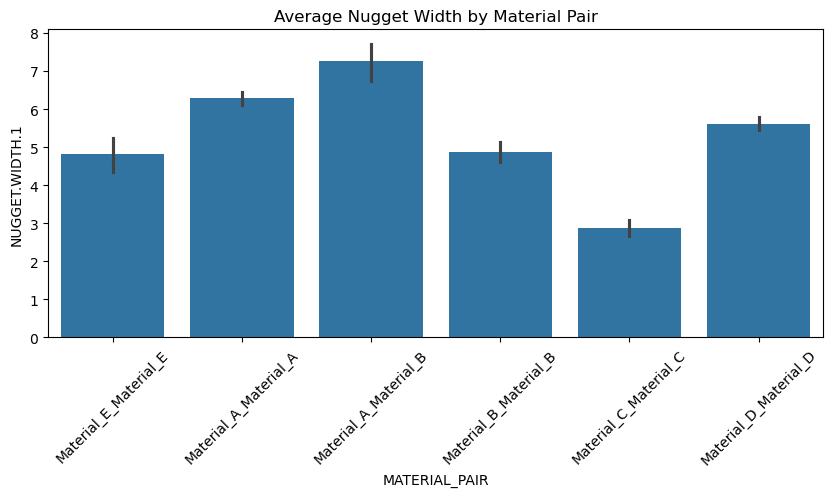

In [44]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='MATERIAL_PAIR', y='NUGGET.WIDTH.1', estimator='mean')
plt.xticks(rotation=45)
plt.title('Average Nugget Width by Material Pair')
plt.show()


# Process parameter relationships
Helps identify linear or nonlinear trends.

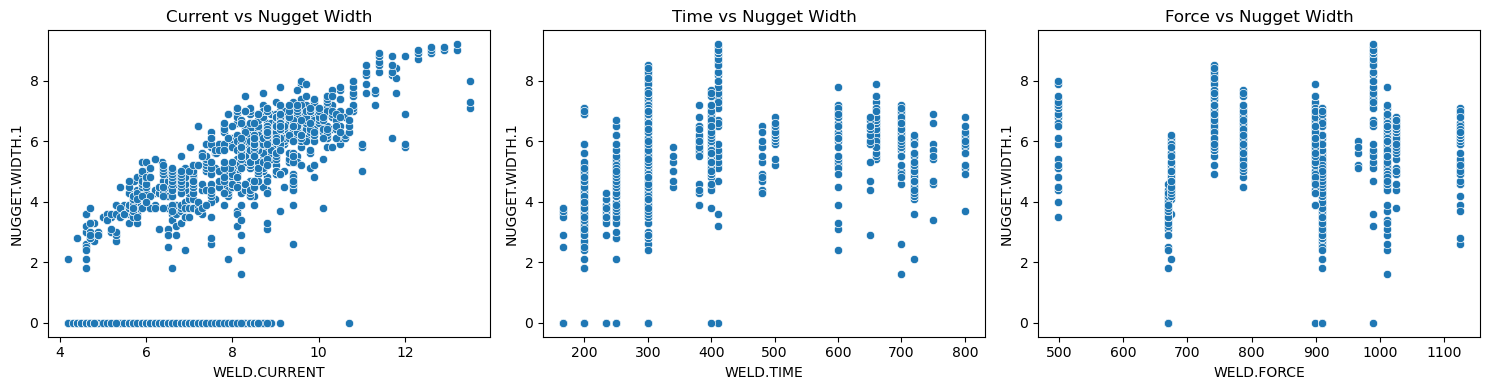

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.scatterplot(data=df, x='WELD.CURRENT', y='NUGGET.WIDTH.1', ax=axes[0])
sns.scatterplot(data=df, x='WELD.TIME', y='NUGGET.WIDTH.1', ax=axes[1])
sns.scatterplot(data=df, x='WELD.FORCE', y='NUGGET.WIDTH.1', ax=axes[2])
axes[0].set_title('Current vs Nugget Width')
axes[1].set_title('Time vs Nugget Width')
axes[2].set_title('Force vs Nugget Width')
plt.tight_layout()
plt.show()


# Categorical vs numeric visualization

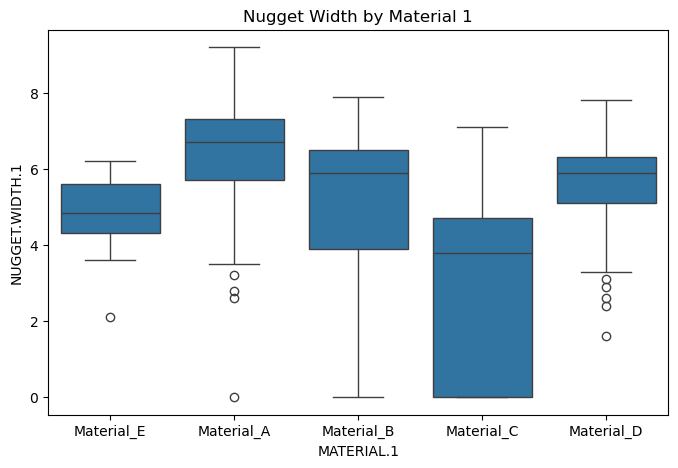

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='MATERIAL.1', y='NUGGET.WIDTH.1')
plt.title('Nugget Width by Material 1')
plt.show()

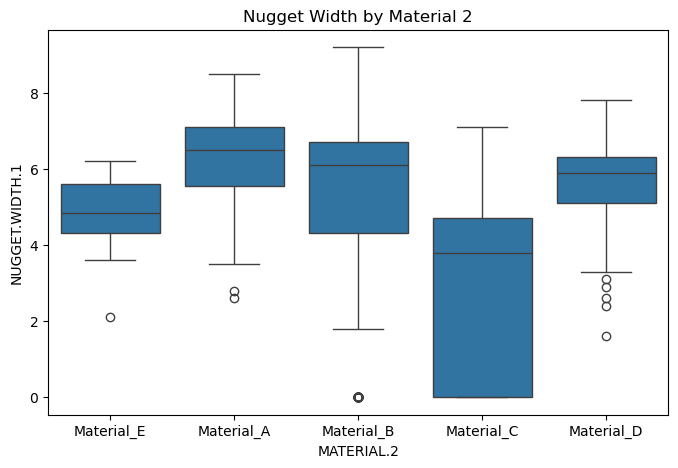

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='MATERIAL.2', y='NUGGET.WIDTH.1')
plt.title('Nugget Width by Material 2')
plt.show()

<Axes: xlabel='SURFACE.CLASS.1', ylabel='NUGGET.WIDTH.1'>

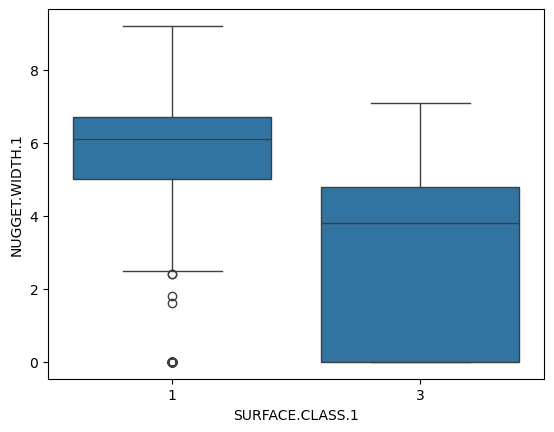

In [51]:
sns.boxplot(data=df, x='SURFACE.CLASS.1', y='NUGGET.WIDTH.1')


# Preprocessing Steps

In [62]:
df.isnull().sum()

NUGGET.WIDTH.1      0
MATERIAL.1          0
THICKNESS.1         0
COATING.EG.1        0
COATING.HDG.1       0
COATING.WEIGHT.1    0
SURFACE.CLASS.1     0
MATERIAL.2          0
THICKNESS.2         0
COATING.EG.2        0
COATING.HDG.2       0
COATING.WEIGHT.2    0
SURFACE.CLASS.2     0
WELD.FORCE          0
WELD.CURRENT        0
WELD.TIME           0
MATERIAL_PAIR       0
dtype: int64

In [ ]:
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df[num_features] < lower_bound) | (df[num_features] > upper_bound))
outlier_counts = outliers.sum().sort_values(ascending=False)
print(outlier_counts)

WELD.FORCE          526
THICKNESS.1         367
THICKNESS.2         205
WELD.TIME           150
COATING.EG.1         14
WELD.CURRENT          7
SURFACE.CLASS.1       0
COATING.WEIGHT.1      0
COATING.HDG.1         0
NUGGET.WIDTH.1        0
COATING.WEIGHT.2      0
COATING.HDG.2         0
COATING.EG.2          0
SURFACE.CLASS.2       0
dtype: int64


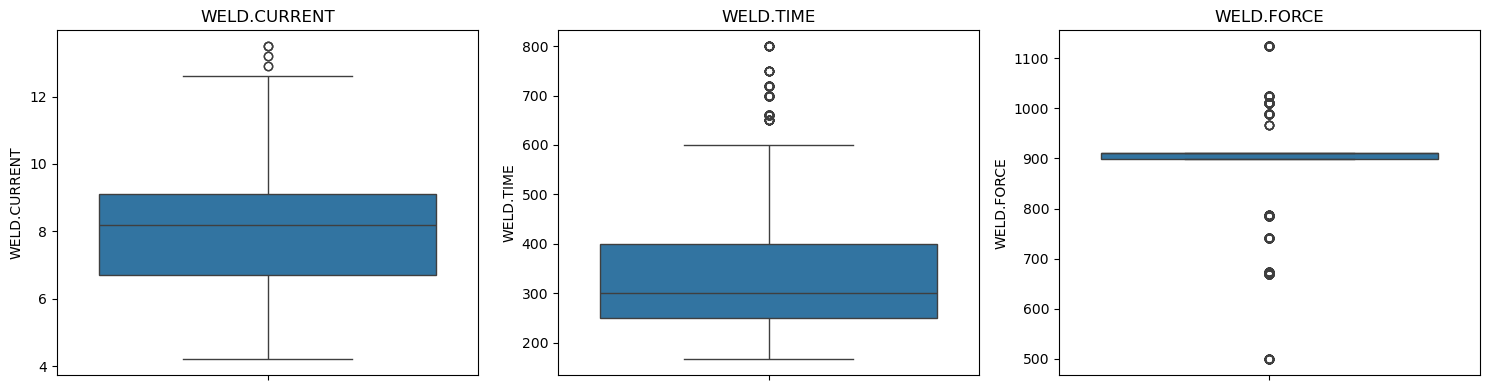

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.boxplot(y=df['WELD.CURRENT'], ax=axes[0])
sns.boxplot(y=df['WELD.TIME'], ax=axes[1])
sns.boxplot(y=df['WELD.FORCE'], ax=axes[2])
axes[0].set_title('WELD.CURRENT')
axes[1].set_title('WELD.TIME')
axes[2].set_title('WELD.FORCE')
plt.tight_layout()
plt.show()


In [102]:
df['MATERIAL_PAIR'].value_counts()

MATERIAL_PAIR
Material_C_Material_C    442
Material_B_Material_B    316
Material_A_Material_A    167
Material_D_Material_D    131
Material_A_Material_B     52
Material_E_Material_E     18
Name: count, dtype: int64

In [165]:
X = df.drop(['NUGGET.WIDTH.1','MATERIAL.1','MATERIAL.2'], axis=1)
y = df['NUGGET.WIDTH.1']

In [166]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='first')

In [167]:
X_cat_features = [col for col in X.columns if X[col].dtype == 'object']
X_num_features = [col for col in X.columns if X[col].dtype != 'object']

In [169]:
encoder.fit(X[X_cat_features])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [170]:
encoder.categories_

[array(['Material_A_Material_A', 'Material_A_Material_B',
        'Material_B_Material_B', 'Material_C_Material_C',
        'Material_D_Material_D', 'Material_E_Material_E'], dtype=object)]

In [172]:
encoded_cols = list(encoder.get_feature_names_out(X_cat_features))
encoded_cols

['MATERIAL_PAIR_Material_A_Material_B',
 'MATERIAL_PAIR_Material_B_Material_B',
 'MATERIAL_PAIR_Material_C_Material_C',
 'MATERIAL_PAIR_Material_D_Material_D',
 'MATERIAL_PAIR_Material_E_Material_E']

In [ ]:
X[encoded_cols] = encoder.transform(X[X_cat_features])

In [ ]:
X = X.drop(columns=['MATERIAL_PAIR'])


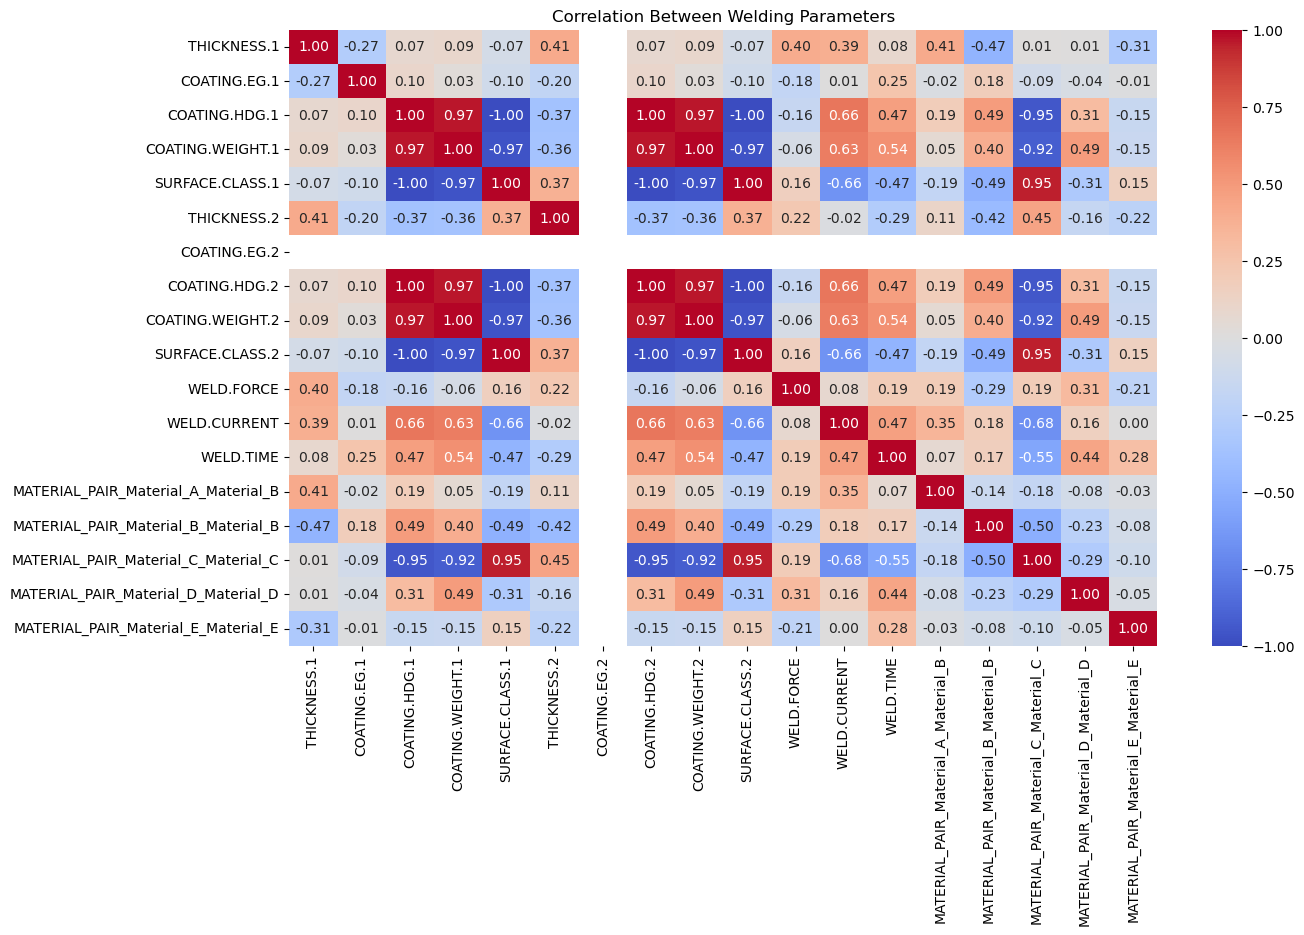

In [193]:
plt.figure(figsize=(14,8))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Welding Parameters')
plt.show()

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Foreset Regressor


R² Score: 0.268040843710723
MAE: 1.3578833413405385


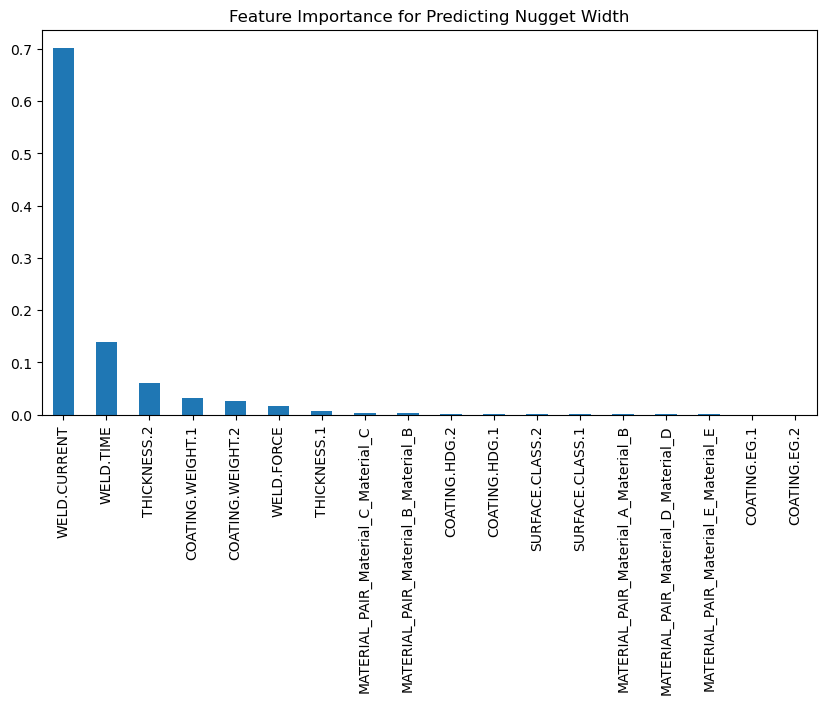

In [194]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance for Predicting Nugget Width")
plt.show()

# Linear Regression

In [191]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [192]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

loss = rmse(y_test, y_pred)
print('Test Loss:', loss)

R² Score: 0.5556668090084449
MAE: 1.2323923886142798
Test Loss: 1.5791560201196155
